# EDA - General Dataset Analyses

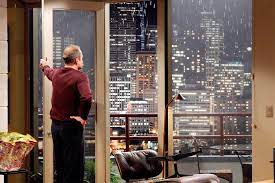

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime, date, time, timedelta


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline


In [3]:
# import cleaned data
df_kc_clean = pd.read_csv('data/king_county_house_clean_dataset.csv')

# disable column truncation
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', -1) 

(array([8.3540e+03, 1.0164e+04, 2.5720e+03, 4.0500e+02, 7.1000e+01,
        2.3000e+01, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  34. ,  156.3,  278.6,  400.9,  523.2,  645.5,  767.8,  890.1,
        1012.4, 1134.7, 1257. ]),
 <BarContainer object of 10 artists>)

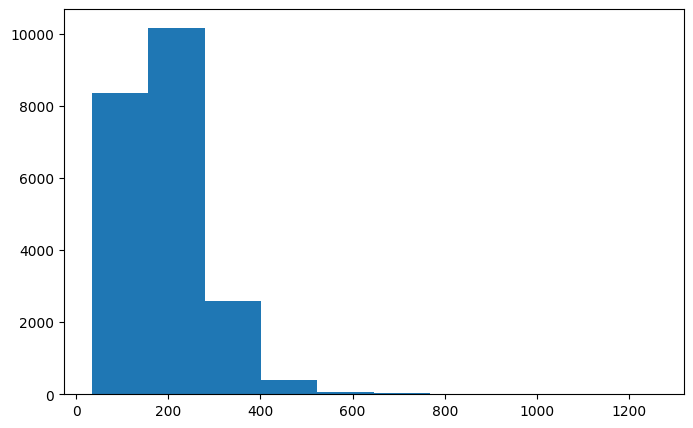

In [4]:
plt.hist(df_kc_clean.sqm_living)

(array([1.960e+02, 2.760e+03, 9.824e+03, 6.882e+03, 1.601e+03, 2.720e+02,
        3.800e+01, 1.300e+01, 6.000e+00, 4.000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

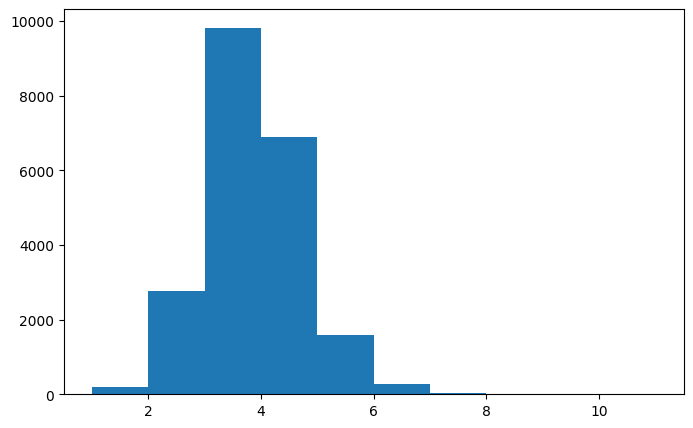

In [5]:
plt.hist(df_kc_clean.bedrooms)

In [6]:
df_kc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21596 non-null  int64  
 1   date              21596 non-null  object 
 2   price             21596 non-null  float64
 3   bedrooms          21596 non-null  int64  
 4   bathrooms         21596 non-null  float64
 5   sqm_living        21596 non-null  int64  
 6   sqm_lot           21596 non-null  int64  
 7   floors            21596 non-null  float64
 8   condition         21596 non-null  int64  
 9   construction      21596 non-null  int64  
 10  yr_built          21596 non-null  int64  
 11  zipcode           21596 non-null  int64  
 12  month_sold        21596 non-null  int64  
 13  social_ngh        21596 non-null  int64  
 14  price_sqm_living  21596 non-null  float64
 15  sqm_total         21596 non-null  float64
 16  price_sqm_total   21596 non-null  float6

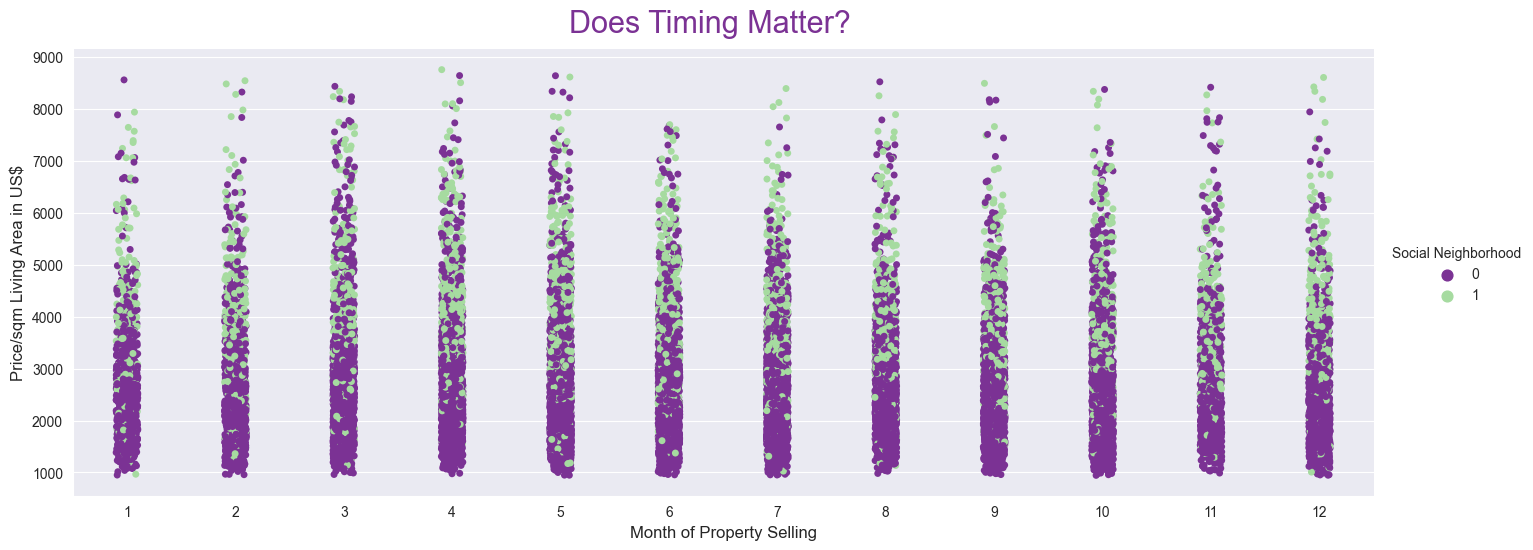

In [42]:
# plot the relationship between price/sqm and month sold, include social neighborhood

# To create custom color palette: Create an array with the colors: 
colors = ['#7b3294','#a6dba0']
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid")

# Create a scatterplot for categorical variables using catplot:
timing_plot = sns.catplot(
    #y ou can use query on the data frame
    data=df_kc_clean,
    # set x and y axes, and a third categorical variable to display in color
    x='month_sold', y='price_sqm_living', hue='social_ngh',
    # the catplot has the option to add jitter to data points to keep them from overlapping as they would in the scatterplot,
    # default is True
    jitter=True, 
    # chose a color palette
    palette=customPalette,
    # by default, the legend is True, but was not to my taste :)
    legend=False
    )

# returns the FacetGrid object 'my_plot' to further customize:

# set figure size:
timing_plot.fig.set_size_inches(15,5)

# set title 
timing_plot.fig.suptitle('Does Timing Matter?', y=(1.05), size=22, color='#7b3294');

# add a nicer legend with more options:{"rows":1,"cols":1}
timing_plot.add_legend(title='Social Neighborhood')

# set axis labels, will set column names by default, x and y in order of appearance:
timing_plot.set_axis_labels('Month of Property Selling','Price/sqm Living Area in US$', fontsize=12)

#plt.show(my_plot)

#save as
timing_plot.savefig("price_timing.jpg")

In [9]:
df_kc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21596 non-null  int64  
 1   date              21596 non-null  object 
 2   price             21596 non-null  float64
 3   bedrooms          21596 non-null  int64  
 4   bathrooms         21596 non-null  float64
 5   sqm_living        21596 non-null  int64  
 6   sqm_lot           21596 non-null  int64  
 7   floors            21596 non-null  float64
 8   condition         21596 non-null  int64  
 9   construction      21596 non-null  int64  
 10  yr_built          21596 non-null  int64  
 11  zipcode           21596 non-null  int64  
 12  month_sold        21596 non-null  int64  
 13  social_ngh        21596 non-null  int64  
 14  price_sqm_living  21596 non-null  float64
 15  sqm_total         21596 non-null  float64
 16  price_sqm_total   21596 non-null  float6

In [10]:
df_kc_clean.describe()

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,month_sold,social_ngh,price_sqm_living,sqm_total,price_sqm_total
count,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000
mean,4580575157.071,540291.957,3.372,2.116,192.768,1402.303,1.494,3.410,2.972,1971.001,98077.951,6.574,0.234,2852.476,543.341,1425.879
std,2876764127.563,367376.019,0.904,0.769,85.299,3847.414,0.540,0.650,0.447,29.375,53.514,3.115,0.424,1189.156,980.252,830.883
min,1000102.000,78000.000,1.000,0.500,34.000,48.000,1.000,1.000,1.000,1900.000,98001.000,1.000,0.000,945.000,73.000,7.000
25%,2123049166.750,322000.000,3.000,1.750,132.000,468.000,1.000,3.000,3.000,1951.000,98033.000,4.000,0.000,1969.000,281.000,816.000
50%,3904930470.000,450000.000,3.000,2.250,177.000,707.000,1.500,3.000,3.000,1975.000,98065.000,6.000,0.000,2640.000,361.000,1243.000
75%,7308950385.000,645000.000,4.000,2.500,236.000,992.000,2.000,4.000,3.000,1997.000,98118.000,9.000,0.000,3438.250,478.000,1874.000
max,9900000190.000,7700000.000,11.000,8.000,1257.000,153414.000,3.500,5.000,5.000,2015.000,98199.000,12.000,1.000,8750.000,38474.000,6582.000


In [11]:
df_social_1 = df_kc_clean.query('social_ngh == 1')

In [12]:
df_social_1.price.describe()

count   5064.000   
mean    689696.820 
std     452276.345 
min     80000.000  
25%     426000.000 
50%     569000.000 
75%     796625.000 
max     7060000.000
Name: price, dtype: float64

In [17]:
df_social_0.price.describe()

count   16532.000  
mean    494527.002 
std     323616.541 
min     78000.000  
25%     300000.000 
50%     419662.500 
75%     595000.000 
max     7700000.000
Name: price, dtype: float64

In [ ]:
df_social_1 = df_kc_clean.query('social_ngh == 1')
df_social_0 = df_kc_clean.query('social_ngh == 0')


In [18]:
df_social_0.price_sqm_living.mean().round()

2616.0

In [19]:
df_social_1.price_sqm_living.mean().round()

3623.0

<AxesSubplot:xlabel='social_ngh', ylabel='price_sqm_living'>

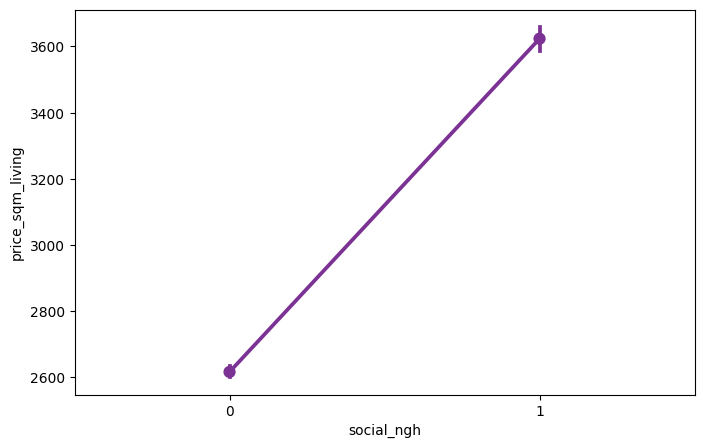

In [20]:
sns.pointplot(x = 'social_ngh', y = 'price_sqm_living', data = df_kc_clean)
#sns.despine()


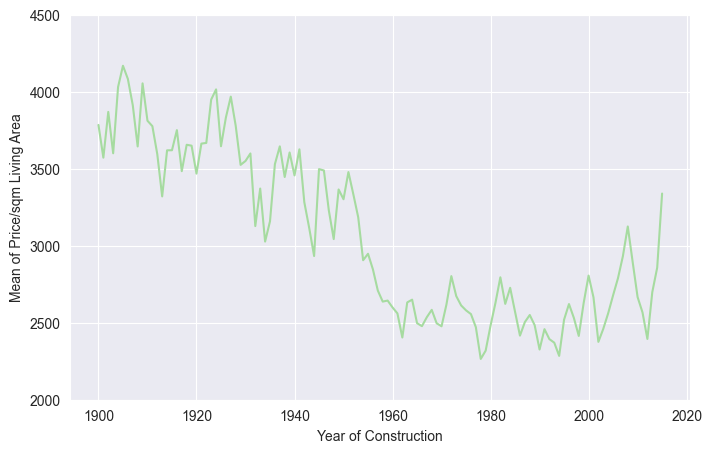

In [54]:
# To create custom color palette: Create an array with the colors: 
colors = ['#a6dba0']
# Set your custom color palette
sns.set_style("darkgrid")
sns.despine()
customPalette = sns.set_palette(sns.color_palette(colors))

price_yr_built = sns.lineplot(x='yr_built', y='price_sqm_living', data= df_kc_clean, ci=None, palette=customPalette)

# set title 
#price_yr_built.set_title('Build Year Effects on Property Price', y=(1.0), size=22, color='#7b3294');

price_yr_built.set(xlabel = 'Year of Construction', ylabel = 'Mean of Price/sqm Living Area')

price_yr_built.set(ylim= (2000, 4500))

plt.savefig("price_yr_build.jpg")



In [30]:
df_kc_clean.query('yr_built < 1950').describe()

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,month_sold,social_ngh,price_sqm_living,sqm_total,price_sqm_total
count,4934.000,4934.000,4934.000,4934.000,4934.000,4934.000,4934.000,4934.000,4934.000,4934.000,4934.000,4934.000,4934.000,4934.000,4934.000,4934.000
mean,4613644416.805,546768.671,3.046,1.626,155.601,947.522,1.314,3.648,2.701,1928.748,98115.773,6.628,0.392,3561.287,392.479,1801.441
std,2858841974.150,383017.631,1.044,0.727,74.799,3713.294,0.395,0.789,0.520,14.638,40.245,3.083,0.488,1369.591,933.921,905.225
min,1200019.000,78000.000,1.000,0.500,34.000,48.000,1.000,1.000,1.000,1900.000,98001.000,1.000,0.000,948.000,73.000,7.000
25%,2122304103.250,322125.000,2.000,1.000,103.000,397.000,1.000,3.000,2.000,1917.000,98105.000,4.000,0.000,2544.250,230.000,1082.000
50%,4059400390.000,467750.000,3.000,1.500,141.000,522.500,1.000,4.000,3.000,1928.000,98117.000,6.000,0.000,3438.000,285.000,1771.000
75%,7231501651.250,655000.000,4.000,2.000,192.000,719.000,1.500,4.000,3.000,1942.000,98133.000,9.000,1.000,4353.000,359.000,2408.750
max,9900000190.000,7700000.000,11.000,8.000,1119.000,153414.000,3.500,5.000,5.000,1949.000,98199.000,12.000,1.000,8750.000,38474.000,5892.000


In [23]:
df_kc_clean.query('yr_built >= 1950').describe()

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,month_sold,social_ngh,price_sqm_living,sqm_total,price_sqm_total
count,16662.000,16662.000,16662.000,16662.000,16662.000,16662.000,16662.000,16662.000,16662.000,16662.000,16662.000,16662.000,16662.000,16662.000,16662.000,16662.000
mean,4570782591.500,538374.053,3.468,2.261,203.774,1536.974,1.548,3.339,3.053,1983.513,98066.751,6.558,0.188,2642.581,588.015,1314.666
std,2882062498.742,362604.374,0.834,0.720,85.111,3876.124,0.565,0.585,0.388,19.230,51.799,3.124,0.391,1041.459,989.178,773.340
min,1000102.000,82000.000,1.000,0.500,35.000,53.000,1.000,1.000,1.000,1950.000,98001.000,1.000,0.000,945.000,80.000,28.000
25%,2123212127.250,322000.000,3.000,1.750,143.000,534.000,1.000,3.000,3.000,1967.000,98029.000,4.000,0.000,1881.000,308.000,780.000
50%,3885805105.000,447475.000,3.000,2.500,188.000,760.000,1.500,3.000,3.000,1984.000,98053.000,6.000,0.000,2472.000,385.000,1145.000
75%,7338220150.000,640000.000,4.000,2.500,248.000,1075.000,2.000,4.000,3.000,2002.000,98106.000,9.000,0.000,3132.000,508.000,1667.000
max,9895000040.000,6890000.000,10.000,8.000,1257.000,95138.000,3.500,5.000,5.000,2015.000,98199.000,12.000,1.000,8633.000,24158.000,6582.000


In [24]:
df_kc_clean.describe()

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,month_sold,social_ngh,price_sqm_living,sqm_total,price_sqm_total
count,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000
mean,4580575157.071,540291.957,3.372,2.116,192.768,1402.303,1.494,3.410,2.972,1971.001,98077.951,6.574,0.234,2852.476,543.341,1425.879
std,2876764127.563,367376.019,0.904,0.769,85.299,3847.414,0.540,0.650,0.447,29.375,53.514,3.115,0.424,1189.156,980.252,830.883
min,1000102.000,78000.000,1.000,0.500,34.000,48.000,1.000,1.000,1.000,1900.000,98001.000,1.000,0.000,945.000,73.000,7.000
25%,2123049166.750,322000.000,3.000,1.750,132.000,468.000,1.000,3.000,3.000,1951.000,98033.000,4.000,0.000,1969.000,281.000,816.000
50%,3904930470.000,450000.000,3.000,2.250,177.000,707.000,1.500,3.000,3.000,1975.000,98065.000,6.000,0.000,2640.000,361.000,1243.000
75%,7308950385.000,645000.000,4.000,2.500,236.000,992.000,2.000,4.000,3.000,1997.000,98118.000,9.000,0.000,3438.250,478.000,1874.000
max,9900000190.000,7700000.000,11.000,8.000,1257.000,153414.000,3.500,5.000,5.000,2015.000,98199.000,12.000,1.000,8750.000,38474.000,6582.000


In [25]:
df_kc_clean.query('social_ngh == 1').describe()

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,month_sold,social_ngh,price_sqm_living,sqm_total,price_sqm_total
count,5064.000,5064.000,5064.000,5064.000,5064.000,5064.000,5064.000,5064.000,5064.000,5064.000,5064.000,5064.000,5064.000,5064.000,5064.000,5064.000
mean,4459597109.795,689696.820,3.352,2.103,193.270,974.007,1.503,3.481,2.998,1959.341,98088.279,6.623,1.000,3623.355,436.774,2007.811
std,2827155699.315,452276.345,1.019,0.831,92.682,3245.782,0.573,0.698,0.477,33.192,59.814,3.105,0.000,1261.553,831.201,893.601
min,3600057.000,80000.000,1.000,0.500,34.000,48.000,1.000,1.000,1.000,1900.000,98004.000,1.000,1.000,967.000,73.000,7.000
25%,2124049211.750,426000.000,3.000,1.500,127.000,371.000,1.000,3.000,3.000,1930.000,98008.000,4.000,1.000,2750.000,230.000,1365.000
50%,3964400140.000,569000.000,3.000,2.000,173.000,557.000,1.500,3.000,3.000,1957.000,98117.000,6.000,1.000,3441.000,322.000,1887.000
75%,7011201007.000,796625.000,4.000,2.500,238.000,859.000,2.000,4.000,3.000,1988.000,98122.000,9.000,1.000,4270.250,444.000,2579.500
max,9839301165.000,7060000.000,10.000,7.500,932.000,108212.000,3.500,5.000,5.000,2015.000,98199.000,12.000,1.000,8750.000,27118.000,6582.000


In [26]:
df_kc_clean.query('social_ngh == 0').describe()

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,month_sold,social_ngh,price_sqm_living,sqm_total,price_sqm_total
count,16532.000,16532.000,16532.000,16532.000,16532.000,16532.000,16532.000,16532.000,16532.000,16532.000,16532.000,16532.000,16532.000,16532.000,16532.000,16532.000
mean,4617632550.695,494527.002,3.378,2.120,192.614,1533.496,1.492,3.388,2.964,1974.572,98074.787,6.559,0.000,2616.344,575.984,1247.624
std,2890861380.616,323616.541,0.866,0.749,82.908,4004.635,0.529,0.634,0.437,27.119,51.015,3.118,0.000,1059.262,1019.363,722.335
min,1000102.000,78000.000,1.000,0.500,35.000,53.000,1.000,1.000,1.000,1900.000,98001.000,1.000,0.000,945.000,81.000,18.000
25%,2123046572.500,300000.000,3.000,1.750,133.000,524.000,1.000,3.000,3.000,1956.000,98033.000,4.000,0.000,1851.000,294.000,751.000
50%,3904902135.000,419662.500,3.000,2.250,179.000,738.000,1.500,3.000,3.000,1978.000,98058.000,6.000,0.000,2423.000,371.000,1078.000
75%,7417775503.000,595000.000,4.000,2.500,235.000,1045.000,2.000,4.000,3.000,1998.000,98115.000,9.000,0.000,3101.000,488.000,1611.250
max,9900000190.000,7700000.000,11.000,8.000,1257.000,153414.000,3.500,5.000,5.000,2015.000,98198.000,12.000,0.000,8636.000,38474.000,5870.000


([], [])

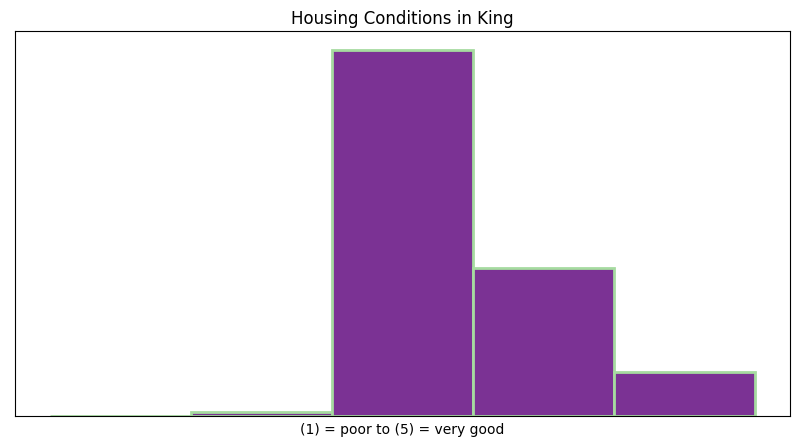

In [27]:
fig, ax = plt.subplots(figsize=(10,5))

#bins = 5 # a nice number of bins based on range


df_kc_clean.hist(ax=ax, column='condition', bins=5, edgecolor='#a6dba0', linewidth=2, color='#7b3294')


# These can also be set in the hist method
ax.set_title('Housing Conditions in King')
ax.set_ylabel('')
ax.set_xlabel('(1) = poor to (5) = very good')
plt.xticks([])
plt.yticks([])

In [ ]:
df_kc_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21596 non-null  int64  
 1   price             21596 non-null  float64
 2   bedrooms          21596 non-null  int64  
 3   bathrooms         21596 non-null  float64
 4   sqm_living        21596 non-null  int64  
 5   sqm_lot           21596 non-null  int64  
 6   floors            21596 non-null  float64
 7   condition         21596 non-null  int64  
 8   construction      21596 non-null  int64  
 9   yr_built          21596 non-null  int64  
 10  zipcode           21596 non-null  int64  
 11  month_sold        21596 non-null  int64  
 12  social_ngh        21596 non-null  int64  
 13  price_sqm_living  21596 non-null  float64
 14  sqm_total         21596 non-null  float64
 15  price_sqm_total   21596 non-null  float64
dtypes: float64(6), int64(10)
memory usage: 2

In [ ]:
corr = df_kc_clean.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,month_sold,social_ngh,price_sqm_living,sqm_total,price_sqm_total
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.02,-0.00,0.02,-0.01,-0.01,-0.02,-0.01,-0.13,0.07
price,-0.02,1.00,0.32,0.53,0.70,0.09,0.26,0.04,0.55,0.05,-0.05,-0.01,0.23,0.55,0.15,0.51
bedrooms,0.00,0.32,1.00,0.53,0.59,0.03,0.18,0.02,0.33,0.16,-0.16,-0.00,-0.01,-0.22,0.08,-0.07
bathrooms,0.01,0.53,0.53,1.00,0.76,0.09,0.50,-0.13,0.55,0.51,-0.20,0.01,-0.01,-0.09,0.15,0.13
sqm_living,-0.01,0.70,0.59,0.76,1.00,0.17,0.35,-0.06,0.62,0.32,-0.20,0.01,0.00,-0.09,0.26,0.03
sqm_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.00,-0.01,0.09,0.05,-0.13,-0.00,-0.06,-0.04,1.00,-0.30
floors,0.02,0.26,0.18,0.50,0.35,-0.00,1.00,-0.26,0.32,0.49,-0.06,0.01,0.01,0.00,0.03,0.31
condition,-0.02,0.04,0.02,-0.13,-0.06,-0.01,-0.26,1.00,-0.10,-0.36,0.00,0.02,0.06,0.10,-0.01,0.01
construction,-0.00,0.55,0.33,0.55,0.62,0.09,0.32,-0.10,1.00,0.36,-0.16,0.01,0.03,0.08,0.14,0.17
yr_built,0.02,0.05,0.16,0.51,0.32,0.05,0.49,-0.36,0.36,1.00,-0.35,-0.01,-0.22,-0.29,0.08,-0.09


In [ ]:
stats.pearsonr(df_kc_clean['price'], df_kc_clean['sqm_living'])

PearsonRResult(statistic=0.701916953340161, pvalue=0.0)

In [ ]:
from scipy import stats as stats
stats.spearmanr(df_kc_clean['price_sqm_living'], df_kc_clean['bathrooms'], axis=0, alternative='two-sided')

SignificanceResult(statistic=-0.11340897316936029, pvalue=9.514396097273769e-63)

In [ ]:
stats.spearmanr(df_kc_clean['price_sqm_living'], df_kc_clean['construction'], axis=0, alternative='two-sided')

SignificanceResult(statistic=0.08000117634395351, pvalue=5.262304061141229e-32)

In [ ]:
stats.spearmanr(df_kc_clean['price_sqm_living'], df_kc_clean['condition'], axis=0, alternative='two-sided')

SignificanceResult(statistic=0.09748907978186554, pvalue=9.22684184072905e-47)

In [ ]:
stats.spearmanr(df_kc_clean['price_sqm_living'], df_kc_clean['bedrooms'], axis=0, alternative='two-sided')

SignificanceResult(statistic=-0.21969840858219986, pvalue=2.620952657785363e-234)

In [ ]:
stats.spearmanr(df_kc_clean['price_sqm_living'], df_kc_clean['month_sold'], axis=0, alternative='two-sided')

SignificanceResult(statistic=-0.030189701181484146, pvalue=9.109197273588214e-06)

In [ ]:
df_kc_clean.price_sqm_living.describe()

count   21596.000
mean    2852.476 
std     1189.156 
min     945.000  
25%     1969.000 
50%     2640.000 
75%     3438.250 
max     8750.000 
Name: price_sqm_living, dtype: float64

In [ ]:
# my clients budget is limited to property in the lowest 15% of the price range
# creating a subset to only hold 'affordable' property:

np.percentile(df_kc_clean['price_sqm_living'], 15)

1717.0

In [ ]:
df_kc_low15 = df_kc_clean.query('price_sqm_living <= 1717')
df_kc_low15.describe()

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,condition,construction,yr_built,zipcode,month_sold,social_ngh,price_sqm_living,sqm_total,price_sqm_total
count,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000,3248.000
mean,4572224714.859,299371.183,3.649,2.179,205.212,1256.929,1.470,3.323,2.912,1977.575,98061.711,6.617,0.048,1465.585,519.446,716.169
std,2852927069.005,102714.048,0.875,0.680,68.476,2928.303,0.490,0.585,0.350,23.494,57.616,3.217,0.215,181.735,749.606,227.700
min,1000102.000,78000.000,1.000,0.500,53.000,100.000,1.000,1.000,1.000,1900.000,98001.000,1.000,0.000,945.000,134.000,25.000
25%,2113700271.250,235000.000,3.000,1.750,160.000,594.750,1.000,3.000,3.000,1962.000,98023.000,4.000,0.000,1349.000,335.000,581.000
50%,3922150171.500,286975.000,4.000,2.250,196.000,749.000,1.000,3.000,3.000,1979.000,98038.000,7.000,0.000,1502.000,387.000,725.000
75%,7299600755.000,350000.000,4.000,2.500,239.000,971.000,2.000,4.000,3.000,1997.000,98092.000,9.000,0.000,1615.000,473.000,865.000
max,9835801000.000,1140000.000,9.000,7.500,694.000,78345.000,3.000,5.000,5.000,2015.000,98198.000,12.000,1.000,1717.000,19925.000,1408.000


In [ ]:
# save affordable df as .csv

df_kc_low15.to_csv('data/king_county_house_affordable_dataset.csv', index=False)